In [14]:
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,Adamax
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [15]:
#path of the ck+ data for the model
train_dir = "../input/ckplus/CK+48" #passing the path with training images


In [16]:
#Data Augmentation and splitting the train and validation data
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2
                                       )


In [17]:
#Loading the train and validation data for the model
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48,48),
                                                    batch_size = 32,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
valid_generator = validation_datagen.flow_from_directory( directory = train_dir,
                                                              target_size = (48,48),
                                                              batch_size = 32,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 788 images belonging to 7 classes.
Found 193 images belonging to 7 classes.


In [18]:
#Defining the CNN Model
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

In [19]:
#Training the model
cnn_model = model.fit(x = train_generator,epochs = 100,batch_size = 32,validation_data = valid_generator)

Epoch 1/100
25/25 [==============================] - 7s 226ms/step - loss: 9.8076 - accuracy: 0.1670 - val_loss: 9.1994 - val_accuracy: 0.0518
Epoch 2/100
25/25 [==============================] - 3s 103ms/step - loss: 9.6767 - accuracy: 0.1762 - val_loss: 9.7341 - val_accuracy: 0.0518
Epoch 3/100
25/25 [==============================] - 3s 102ms/step - loss: 9.1729 - accuracy: 0.2865 - val_loss: 10.5974 - val_accuracy: 0.0518
Epoch 4/100
25/25 [==============================] - 3s 103ms/step - loss: 8.9193 - accuracy: 0.3736 - val_loss: 11.5927 - val_accuracy: 0.0518
Epoch 5/100
25/25 [==============================] - 3s 108ms/step - loss: 8.8899 - accuracy: 0.3875 - val_loss: 12.5511 - val_accuracy: 0.0518
Epoch 6/100
25/25 [==============================] - 3s 104ms/step - loss: 8.7138 - accuracy: 0.4138 - val_loss: 13.7877 - val_accuracy: 0.0518
Epoch 7/100
25/25 [==============================] - 3s 102ms/step - loss: 8.6201 - accuracy: 0.4521 - val_loss: 13.7969 - val_accuracy: 0

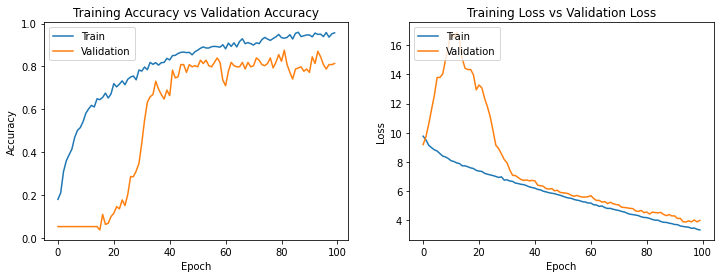

In [20]:
#Displaying the Accuracy and Loss Graphs
fig , ax = plt.subplots(1,2)
train_acc = cnn_model.history['accuracy']
train_loss = cnn_model.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(cnn_model.history['accuracy'])
ax[0].plot(cnn_model.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(cnn_model.history['loss'])
ax[1].plot(cnn_model.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Text(0.5, 1.0, 'Confusion Matrix')

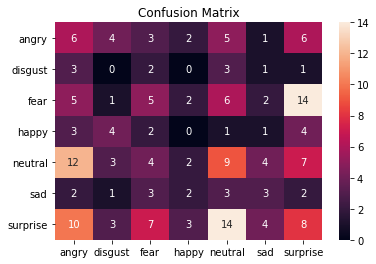

In [21]:
#Confusion matrix for the model
Y_pred = model.predict_generator(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
conf = confusion_matrix(valid_generator.classes, y_pred)

x_axis_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] # labels for x-axis
y_axis_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] # labels for y-axis
ax = plt.axes()
sns.heatmap(conf, annot=True, fmt ="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set_title('Confusion Matrix')

